In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import scipy.stats as stats
%matplotlib inline
import nltk
from nltk.collocations import *
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.height', 1000) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

height has been deprecated.



In [17]:
# Import data

raw_data = pd.read_table("amazon_cells_labelled.txt", header=None)

### Data
Data was acuired from the UCI Machine Learning Repository and contains sentences taken from Amazon reviews that are labeled as having either a positive(1) or negative(0) sentenment.  There are 1000 rows of data.  Data from IMDB reviews was also acquired from the same source to use for testing.

link : https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#

In [18]:
# See number of rows in dataset.
len(raw_data)

1000

In [19]:
# Create empty dataframe
data = []

In [20]:
# See raw data
raw_data

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [21]:
# Create working copy of data
data = raw_data
#

In [22]:
data.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [23]:
# Rename columns
data.columns=["sentence","sentiment"]

In [24]:
#Convert sentences to lowercase
data["sentence"] = data["sentence"].str.lower()

In [25]:
def cleaner():
    data['sentence'] = data['sentence'].str.replace('.', ' ')
    data['sentence'] = data['sentence'].str.replace(',', ' ')
    data['sentence'] = data['sentence'].str.replace('!', ' ')
    data['sentence'] = data['sentence'].str.replace("'", ' ')
    data['sentence'] = data['sentence'].str.replace('?', ' ')
    data['sentence'] = data['sentence'].str.replace('*', ' ')
    data['sentence'] = data['sentence'].str.replace('"', ' ')
    data['sentence'] = data['sentence'].str.replace('"', ' ')
    data['sentence'] = data['sentence'].str.replace('-', ' ')
    data['sentence'] = data['sentence'].str.replace('(', ' ')
    data['sentence'] = data['sentence'].str.replace(')', ' ')
    data['sentence'] = data['sentence'].str.replace(':', ' ')
    data['sentence'] = data['sentence'].str.replace('/', ' ')

In [105]:
file_name_amazon = "amazon_cells_labelled.txt"

In [119]:
def run_bnb(keywords,file_name):
    raw_data = pd.read_table(file_name, header=None)
    data = []
    data = raw_data
    data.columns=["sentence","sentiment"]
    cleaner()
    for key in keywords:        
        data[str(key)] = data.sentence.str.contains(' ' + str(key) + ' ',case=False)
    data["sentiment"] = (data["sentiment"] == 1)
    analysis_data = data[keywords]
    target = data["sentiment"]
    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()
    bnb.fit(analysis_data,target)
    y_pred= bnb.predict(analysis_data)
    print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0],(target != y_pred).sum()))
    t =confusion_matrix(target, y_pred)
    sensitivity =t[1][1]/((t[1][0])+(t[1][1]))
    print(("Sensitivity : %s") % (sensitivity))
    specificity = t[0][0]/((t[0][0])+(t[0][1]))
    print(("Specificity : %s") % (specificity))

In [ ]:
data= pd.DataFrame()
raw_data = pd.DataFrame()

#### Create Features

In order to create features I will look at which words are used most frequently in positive reviews.  As I look through the words I will decide which ones seem to be most likely associated with positive reviews, as opposed to used that are ambigious in their sentiment. 

In [45]:
# Create empty dataframe
count = pd.DataFrame()

# See count of how frequently words are used

count = positive.sentence.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
count = count.sort_values()
count.tail(5)

it     145.0
i      186.0
and    189.0
the    239.0
       814.0
dtype: float64

In [48]:
# Create empty dataframe
count = pd.DataFrame()

# See count of how frequently words are used

count = negative.sentence.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
count = count.sort_values()
count.tail()

and    122.0
it     166.0
i      193.0
the    280.0
       843.0
dtype: float64

In [44]:
# Create dataframes with separated positive and negeative data.
positive = data.loc[data["sentiment"]== 1]
negative = data.loc[data["sentiment"]== 0]

In [120]:
#Version 1

v1_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent"]

run_bnb(v1_keywords, file_name_amazon)

Number of mislabeled points out of a total 1000 points : 338
Sensitivity : 0.412
Specificity : 0.912


Version one was the starting point, with the most common words from the slice of positive reviews set as keywords. 338 points out of 1,000 were mislabled.  Sensitivity was 41.2% and specificity was 91.2%.  The model is quite good at identifying negative reviews, but not nearly as good as identifying positive reviews.

In [121]:
#Version 2

v2_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","poor","bad","worst"]

run_bnb(v2_keywords,file_name_amazon)

Number of mislabeled points out of a total 1000 points : 327
Sensitivity : 0.408
Specificity : 0.938


For version two additional keywords from the slice of positive reviews were added. Keywords were also added from the negative dataset. This resulted in 327 points out of 1,000 were mislabled, a slight improvement.  Sensitivity was 40.8% and specificity was 93.8%.  Sensitivity decreased a small amount from version one, while specificity improved.  

In [122]:
# Version 3 - Added more keywords
v3_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","poor","bad","worst","doesn't","waste","disappointed","unhappy","problem","but","money","terrible"]

run_bnb(v3_keywords,file_name_amazon)

Number of mislabeled points out of a total 1000 points : 327
Sensitivity : 0.406
Specificity : 0.94


For version 3 several more keywords were added.  This had no impact on accuracy as  327 out of 1,000 points mislabled, the same as version two. Sensitivity was 40.6% and specificity was 94%.  Version three was slightly better at identifying negative comments than version 2 and much better than version one.  In terms of identifying positive statements version three was slightly worse than both versions two and one.

In [123]:
# Version 4 - Removed features that don't benefit performance
v4_keywords = ["best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","bad","worst","doesn't","disappointed"]

run_bnb(v4_keywords,file_name_amazon)


Number of mislabeled points out of a total 1000 points : 327
Sensitivity : 0.406
Specificity : 0.94


Version four was removal of features that were not materially benefiting accuracy.  There was no change in sensitivity and specificity, reinforcing that these features were not benefiting the model.  With the model refined version five will work to find further improvements.

In [126]:
# Version 5 - Went through raw data, identified data is all related to phone reviews.  Added phone specific keywords, and a phrase.
v5_keywords = ["fast","slim","cool","beautiful","well made","best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","bad","worst","doesn't","disappointed"]

run_bnb(v5_keywords,file_name_amazon)


Number of mislabeled points out of a total 1000 points : 321
Sensitivity : 0.418
Specificity : 0.94


In [78]:
raw_data = pd.read_table("amazon_cells_labelled.txt", header=None)
raw_data = np.array_split(raw_data,3)

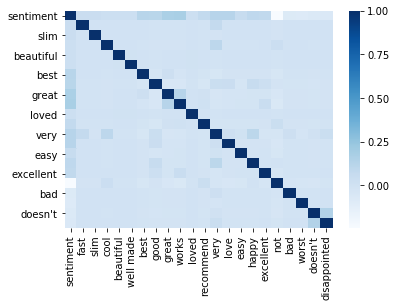

In [118]:
# Heatmap to see correlation between keywords for final version

raw_data_v5 = pd.read_table("amazon_cells_labelled.txt", header=None)
data_v5 = pd.DataFrame()
data_v5 = raw_data_v5
data_v5.columns=["sentence","sentiment"]
cleaner()
keywords = v5_keywords
for key in keywords:        
    data_v5[str(key)] = data_v5.sentence.str.contains(' ' + str(key) + ' ',case=False)
data_v5["sentiment"] = (data_v5["sentiment"] == 1)

sns.heatmap(data_v5.corr(), cmap="Blues")

The heatmap for the final version shows that there is not a strong correlation between any of the features.

Version 5 involved adding more keywords, as well as one phrase that was identfyied while looking through the data, "well made".  Accuracy improved as only 321 points were mislabled.  Sensitivity improved to 41.8% and specificity stayed at 94% versus version three.  Looking from the start the model improved overall in accuracy, specificity and sensitivity.  Version 5 appears to work the best.  The first keywords that I added first due had the most impact. They were added first as they appeared most frequently through the dataset, which aligns with their final imapct.  Towards the end as I was combing closer and closer through the data there was only incremental benefit as I added more keywords. There was also great benefit in cleaning up the data by converting all of the sentences to lower case and also stripping out punctuation.  One area I would like to explore further is the benefits of being able to find the most common phrases and adding them to the keywords. Overfitting does not appear to be an issue as even when the data is segmented for cross validation the sensitivity the accuracy does not appear to meaninfully change.

In [175]:
# NOT WORKING - SPLIT ISN'T FUNCTIONING

def run_bnb_validation(keywords,file_name):
    raw_data_validation = pd.read_table(file_name, header=None)
    data_validation = []
    data_validation = raw_data_validation
    data_validation.columns=["sentence","sentiment"]
    cleaner()
    for key in keywords:        
        data_validation[str(key)] = data_validation.sentence.str.contains(' ' + str(key) + ' ',case=False)
    data_validation["sentiment"] = (data_validation["sentiment"] == 1)
    analysis_data_validation = data_validation[keywords]
    target_validation = data_validation["sentiment"]
    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()
    
    #analysis_data_train, target_train, analysis_data_test, target_test = train_test_split(analysis_data_validation, target_validation, test_size=0.8, random_state=42)
    analysis_data_train, target_train, analysis_data_test, target_test = train_test_split(analysis_data_validation, target_validation, test_size=0.8, random_state=42)
    
    bnb.fit(analysis_data_train,target_train)
    y_pred_train= bnb.predict(analysis_data_train)
    #y_pred_test=  bnb.predict(analysis_data_test)
    print("Number of Train mislabeled points out of a total {} points : {}".format(data_train.shape[0],(target != y_pred_train).sum()))
    t_train =confusion_matrix(target_train, y_pred_train)
    train_sensitivity =t_train[1][1]/((t_train[1][0])+(t_train[1][1]))
    print(("Train Sensitivity : %s") % (train_sensitivity))
    train_specificity = t_train[0][0]/((t_train[0][0])+(t_train[0][1]))
    print(("Train Specificity : %s") % (train_specificity))
    
    print("Number of Test mislabeled points out of a total {} points : {}".format(data_test.shape[0],(target != y_pred_test).sum()))
    t_test =confusion_matrix(target_test, y_pred_test)
    test_sensitivity =t_test[1][1]/((t_test[1][0])+(test[1][1]))
    print(("Test Sensitivity : %s") % (test_sensitivity))
    test_specificity = t_test[0][0]/((t_test[0][0])+(t_test[0][1]))
    print(("Test Specificity : %s") % (test_specificity))

In [173]:
# Splits data in to train and test and runs through model
def run_bnb_validation(keywords,file_name):
    raw_data_validation = pd.read_table(file_name, header=None)
    data_validation = []
    data_validation = raw_data_validation
    data_validation.columns=["sentence","sentiment"]
    cleaner()
    for key in keywords:        
        data_validation[str(key)] = data_validation.sentence.str.contains(' ' + str(key) + ' ',case=False)
    data_validation["sentiment"] = (data_validation["sentiment"] == 1)
    analysis_data_validation = data_validation[keywords]
    analysis_data_validation = np.array_split(analysis_data_validation,2)
    analysis_data_train = analysis_data_validation[0]
    analysis_data_test = analysis_data_validation[1]
    target_validation = data_validation["sentiment"]
    target_validation = np.array_split(target_validation,2)
    target_train = target_validation[0]
    target_test = target_validation[1]
    from sklearn.naive_bayes import BernoulliNB
    bnb = BernoulliNB()
#Train
    bnb.fit(analysis_data_train,target_train)
    y_pred_train= bnb.predict(analysis_data_train)
    y_pred_test=  bnb.predict(analysis_data_test)
    print("Number of Train mislabeled points out of a total {} points : {}".format(analysis_data_train.shape[0],(target_train != y_pred_train).sum()))
    t_train =confusion_matrix(target_train, y_pred_train)
    train_sensitivity =t_train[1][1]/((t_train[1][0])+(t_train[1][1]))
    print(("Train Sensitivity : %s") % (train_sensitivity))
    train_specificity = t_train[0][0]/((t_train[0][0])+(t_train[0][1]))
    print(("Train Specificity : %s") % (train_specificity))
#Test
    print("Number of Test mislabeled points out of a total {} points : {}".format(analysis_data_test.shape[0],(target_test != y_pred_test).sum()))
    t_test =confusion_matrix(target_test, y_pred_test)
    test_sensitivity =t_test[1][1]/((t_test[1][0])+(t_test[1][1]))
    print(("Test Sensitivity : %s") % (test_sensitivity))
    test_specificity = t_test[0][0]/((t_test[0][0])+(t_test[0][1]))
    print(("Test Specificity : %s") % (test_specificity))

In [174]:
# Split data in to train and test and check for overfitting
v5_keywords = ["fast","slim","cool","beautiful","well made","best","good","great", "works","loved","recommend","very","love","easy","happy","excellent","not","bad","worst","doesn't","disappointed"]

run_bnb_validation(v5_keywords,file_name_amazon)

Number of Train mislabeled points out of a total 500 points : 163
Train Sensitivity : 0.425287356322
Train Specificity : 0.945606694561
Number of Test mislabeled points out of a total 500 points : 158
Test Sensitivity : 0.410041841004
Test Specificity : 0.934865900383
